<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/distillationoilgas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Distillation
#@markdown Introduction to distillation in oil and gas processing
%%capture
!pip install neqsim==2.5.35
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

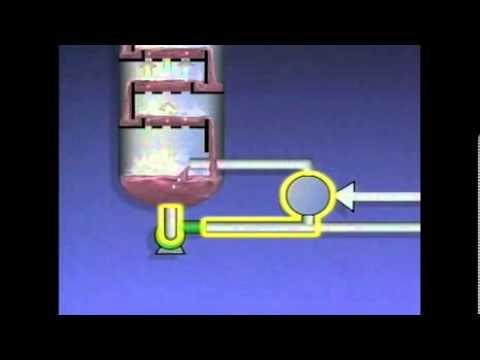

In [2]:
#@title  Oil and gas distillation
#@markdown Introduction to Oil and gas distillation
from IPython.display import YouTubeVideo
YouTubeVideo('gYnGgre83CI', width=600, height=400)

#Simulation of a distillation process using NeqSim
In the following example we will illustrate the distillation of a water-ethanol mixture using NeqSim.

In [3]:
from neqsim.thermo import fluid
from neqsim.process import clearProcess, stream, runProcess, valve
from neqsim.thermo.thermoTools import *
import pandas as pd
# Create a gas-condensate fluid
wateretoh = {'ComponentName':  ['methane', 'water', "MEG"],
        'MolarComposition[-]':  [0.02, 0.48, 0.5]
}

gascondensatedf = pd.DataFrame(wateretoh)
print("Fluid:\n")
print(gascondensatedf.head(30).to_string())
aqueousFluid = fluid_df(gascondensatedf, lastIsPlusFraction=False).autoSelectModel()

Fluid:

  ComponentName  MolarComposition[-]
0       methane                 0.02
1         water                 0.48
2           MEG                 0.50


In [4]:
feedStream = stream(aqueousFluid)
feedStream.setFlowRate(1000.0, 'kg/day')
feedStream.setPressure(1.1, 'bara')
feedStream.setTemperature(90.0, 'C')
feedStream.run()
printFrame(feedStream.getFluid())

| 0                  | 1          | 2                    | 3                    | 4   | 5   | 6               |
|:-------------------|:-----------|:---------------------|:---------------------|:----|:----|:----------------|
|                    | total      | GAS                  | AQUEOUS              |     |     |                 |
| methane            | 2E-2       | 6.95071E-1           | 5.7603E-5            |     |     | [mole fraction] |
| water              | 4.8E-1     | 2.98837E-1           | 4.85352E-1           |     |     | [mole fraction] |
| MEG                | 5E-1       | 6.09211E-3           | 5.14591E-1           |     |     | [mole fraction] |
|                    |            |                      |                      |     |     |                 |
| Density            |            | 6.18831E-1           | 1.04319E3            |     |     | [kg/m^3]        |
| PhaseFraction      |            | 2.86935E-2           | 9.71306E-1           |     |     | [mole frac

# Simulation of a de-ethanizer

In [15]:
import neqsim
from neqsim.thermo.thermoTools import *

from neqsim.process import stream, heater, distillationColumn

In [30]:
#Feed gas
fluidcomposition = {'ComponentName':  ["methane", "ethane", "propane", "i-butane", "n-butane", "i-pentane", "n-pentane", "n-octane"],
      'MolarComposition[-]':  [24.423, 38.0634, 14.8, 14.9, 6.7896, 1.6, 2.8, 3.8],
  }
fluidcompositiondf = pd.DataFrame(fluidcomposition)
fluid1 = fluid_df(fluidcompositiondf, lastIsPlusFraction=False)
fluid1.setMixingRule('classic')

clearProcess()

streamfeed = stream(fluid1)

inletheater = heater(streamfeed)
inletheater.setOutPressure(31.0, 'bara')
inletheater.setOutTemperature(-25.0, 'C')

#FRACTIONATION PROCESS
deethanizer = distillationColumn(trays=5, reboil=True, condenser=False, name="deethanizer")
deethanizer.addFeedStream(inletheater.getOutStream(),5)
deethanizer.getReboiler().setOutTemperature(273.15+120.0)
deethanizer.setTopPressure(30.0)
deethanizer.setBottomPressure(32.0)

runProcess()

printFrame(inletheater.getOutStream().getFluid())

printFrame(deethanizer.getGasOutStream().getFluid())

printFrame(deethanizer.getLiquidOutStream().getFluid())

| 0                  | 1          | 2                  | 3                  | 4   | 5   | 6               |
|:-------------------|:-----------|:-------------------|:-------------------|:----|:----|:----------------|
|                    | total      | GAS                | OIL                |     |     |                 |
| methane            | 2.27878E-1 | 7.79532E-1         | 2.11782E-1         |     |     | [mole fraction] |
| ethane             | 3.55149E-1 | 1.92009E-1         | 3.59909E-1         |     |     | [mole fraction] |
| propane            | 1.38091E-1 | 1.86754E-2         | 1.41575E-1         |     |     | [mole fraction] |
| i-butane           | 1.39024E-1 | 7.18468E-3         | 1.4287E-1          |     |     | [mole fraction] |
| n-butane           | 6.335E-2   | 2.16517E-3         | 6.51352E-2         |     |     | [mole fraction] |
| i-pentane          | 1.49287E-2 | 1.8879E-4          | 1.53588E-2         |     |     | [mole fraction] |
| n-pentane          | 2.612

#Simulation of a de-butanizer

In [33]:
clearProcess()
valvetodebutanizer = valve(deethanizer.getLiquidOutStream())
valvetodebutanizer.setOutletPressure(14.0)

debutanizer = distillationColumn(trays=10, reboil=True, condenser=True, name="debutanizer")
debutanizer.addFeedStream(valvetodebutanizer.getOutStream(),9)
debutanizer.getCondenser().setRefluxRatio(0.1)
debutanizer.getCondenser().setTotalCondenser(True)
debutanizer.getReboiler().setOutTemperature(273.15+203.0);
debutanizer.setTopPressure(12.8)
debutanizer.setBottomPressure(15.0)

runProcess()



In [34]:
#debutanizer results
print('LPG from top debutanizer ')
printFrame(debutanizer.getGasOutStream().getFluid())
print('C5+ from bottom debutanizer ')
printFrame(debutanizer.getLiquidOutStream().getFluid())

LPG from top debutanizer 
| 0                  | 1          | 2                 | 3   | 4   | 5   | 6               |
|:-------------------|:-----------|:------------------|:----|:----|:----|:----------------|
|                    | total      | OIL               |     |     |     |                 |
| methane            | 2.22482E-3 | 2.22482E-3        |     |     |     | [mole fraction] |
| ethane             | 1.53336E-1 | 1.53336E-1        |     |     |     | [mole fraction] |
| propane            | 2.66989E-1 | 2.66989E-1        |     |     |     | [mole fraction] |
| i-butane           | 3.56216E-1 | 3.56216E-1        |     |     |     | [mole fraction] |
| n-butane           | 1.55481E-1 | 1.55481E-1        |     |     |     | [mole fraction] |
| i-pentane          | 2.50394E-2 | 2.50394E-2        |     |     |     | [mole fraction] |
| n-pentane          | 3.79316E-2 | 3.79316E-2        |     |     |     | [mole fraction] |
| n-octane           | 2.78278E-3 | 2.78278E-3        